<a href="https://colab.research.google.com/github/Abogundipe/Analysis-of-NHTSA-Car-complaints/blob/main/CarAnalysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
%%capture
!pip install plotly

In [105]:
# Import Libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objects as go

In [106]:
df= pd.read_csv('/content/drive/MyDrive/NHTSA Project/COMPLAINTS_RECEIVED_2020-2024.csv')

In [107]:
df.shape

(209480, 20)

In [108]:
df.head()

,Complain ID,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,NUMBER OF FATALITIES,SPECIFIC COMPONENT'S DESCRIPTION,CONSUMER'S CITY,CONSUMER'S STATE CODE,VEHICLE MILEAGE AT FAILURE,DESCRIPTION OF THE COMPLAINT,WAS INCIDENT REPORTED TO POLICE,ANTI-LOCK BRAKES,CRUISE CONTROL,VEHICLE SPEED,WAS VEHICLE TOWED,Year
0,514478,"Nissan North America, Inc.",NISSAN,ALTIMA,2000.0,N,N,0,0,UNKNOWN OR OTHER,SUNNYVALE,CA,NaN,"HEAT DISPAY, SPEEDOMETER/ODOMETER/RPM METER FA...",N,N,Y,65.0,N,2005
1,514479,"Nissan North America, Inc.",NISSAN,ALTIMA,2000.0,N,N,0,0,ELECTRICAL SYSTEM,SUNNYVALE,CA,NaN,"HEAT DISPAY, SPEEDOMETER/ODOMETER/RPM METER FA...",N,N,Y,65.0,N,2005
2,514486,"Porsche Cars North America, Inc.",PORSCHE,911,2002.0,N,N,0,0,ENGINE AND ENGINE COOLING:ENGINE,CHANDLER,AZ,NaN,WHILE TRAVELING AT 45 MPH THERE WAS A LOUD RUM...,N,N,N,45.0,N,2005
3,514487,UNKNOWN MANUFACTURER,UNKNOWN,UNKNOWN,9999.0,N,N,0,0,TIRES,GRANITE CITY,IL,NaN,WHILE DRIVING THE FRONT INSIDE DUEL TIRE SEPA...,N,N,N,NaN,N,2005
4,514490,"Chrysler (FCA US, LLC)",PLYMOUTH,VOYAGER,1999.0,N,N,0,0,AIR BAGS:FRONTAL:DRIVER SIDE:INFLATOR MODULE,SAINT PETERSBURG,FL,NaN,CONSUMER STATES WHILE TRAVELING AIR BAG INDIC...,N,Y,N,NaN,N,2005


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209480 entries, 0 to 209479
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Complain ID                       209480 non-null  int64  
 1   MANUFACTURER'S NAME               209480 non-null  object 
 2   VEHICLE MAKE                      209480 non-null  object 
 3   VEHICLE MODEL                     209480 non-null  object 
 4   MODEL YEAR                        209480 non-null  float64
 5   WAS VEHICLE INVOLVED IN A CRASH   209480 non-null  object 
 6   WAS VEHICLE INVOLVED IN A FIRE    209480 non-null  object 
 7   NUMBER OF PERSONS INJURED         209480 non-null  int64  
 8   NUMBER OF FATALITIES              209480 non-null  int64  
 9   SPECIFIC COMPONENT'S DESCRIPTION  209480 non-null  object 
 10  CONSUMER'S CITY                   209480 non-null  object 
 11  CONSUMER'S STATE CODE             209480 non-null  o

# Exploratory Data Analysis

In [110]:
# Find the top makes of Cars and the top brands
df.columns

Index(['Complain ID', 'MANUFACTURER'S NAME', 'VEHICLE MAKE', 'VEHICLE MODEL',
       'MODEL YEAR', 'WAS VEHICLE INVOLVED IN A CRASH',
       'WAS VEHICLE INVOLVED IN A FIRE', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF FATALITIES', 'SPECIFIC COMPONENT'S DESCRIPTION',
       'CONSUMER'S CITY', 'CONSUMER'S STATE CODE',
       'VEHICLE MILEAGE AT FAILURE', 'DESCRIPTION OF THE COMPLAINT',
       'WAS INCIDENT REPORTED TO POLICE', 'ANTI-LOCK BRAKES', 'CRUISE CONTROL',
       'VEHICLE SPEED', 'WAS VEHICLE TOWED', 'Year'],
      dtype='object')

<ipython-input-111-b5b60b6266dd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_makes.values, y=top_vehicle_makes.index, ax=ax1, palette='viridis')
<ipython-input-111-b5b60b6266dd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_models.values, y=top_vehicle_models.index, ax=ax2, palette='viridis')


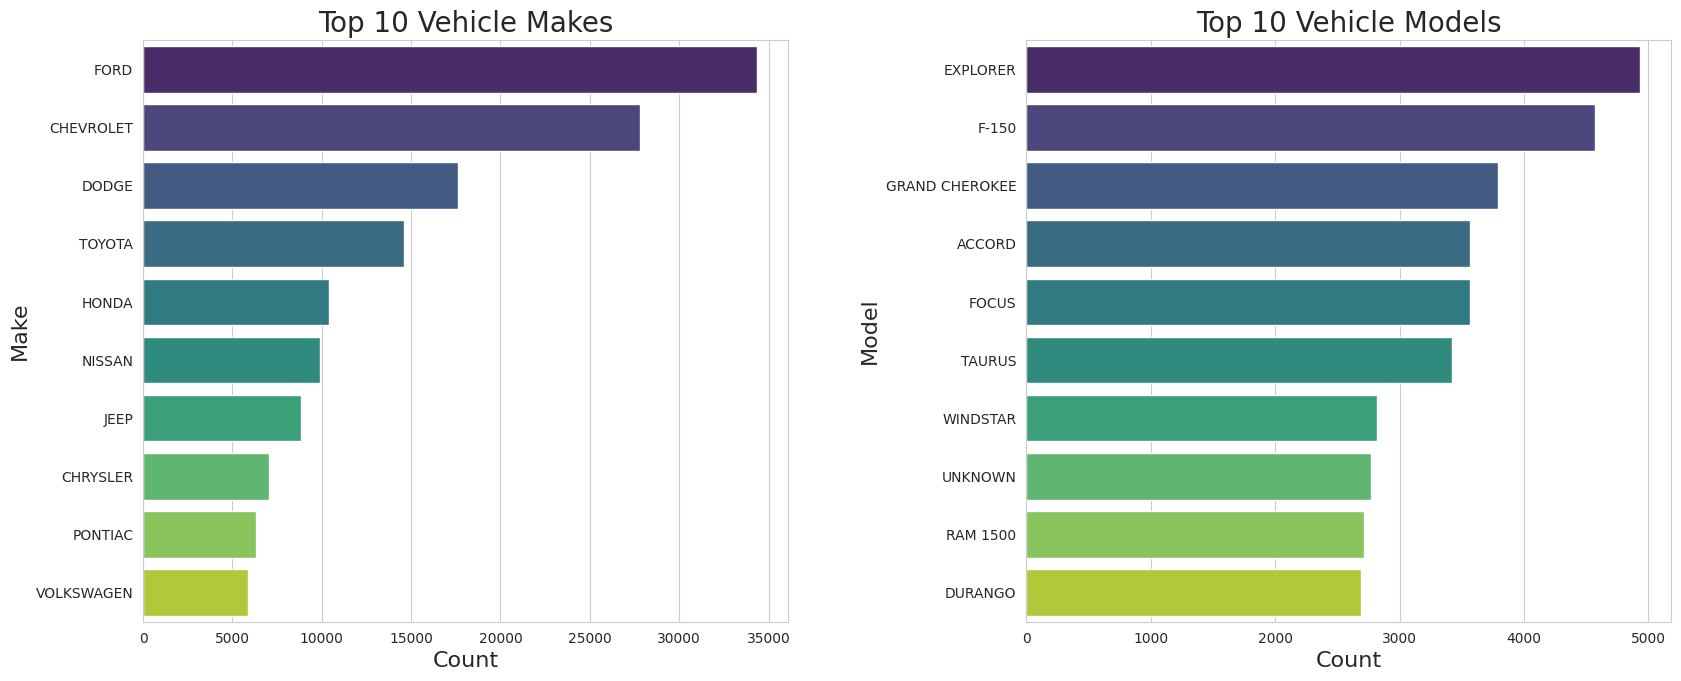

In [111]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

# Plot top 10 vehicle makes
top_vehicle_makes = df['VEHICLE MAKE'].value_counts().head(10).sort_values(ascending=False)  # Sort in descending order
sns.barplot(x=top_vehicle_makes.values, y=top_vehicle_makes.index, ax=ax1, palette='viridis')
ax1.set_title('Top 10 Vehicle Makes', fontsize=20)
ax1.set_xlabel('Count', fontsize=16)
ax1.set_ylabel('Make', fontsize=16)

# Plot top 10 vehicle models
top_vehicle_models = df['VEHICLE MODEL'].value_counts().head(10).sort_values(ascending=False)  # Sort in descending order
sns.barplot(x=top_vehicle_models.values, y=top_vehicle_models.index, ax=ax2, palette='viridis')
ax2.set_title('Top 10 Vehicle Models', fontsize=20)
ax2.set_xlabel('Count', fontsize=16)
ax2.set_ylabel('Model', fontsize=16)

# Adjust layout and show plot
plt.tight_layout(pad=5)
plt.show()

Based on the result of the plot, we can observe that during the review period 2020 to 2024, the car make Ford with model Explorers experinces the most compliants. This could be for a number of reasons

In [112]:
print(df['Year'].unique())

[2005 2009 2004 2006 2007 2008]


# Top 10 Car Complaints

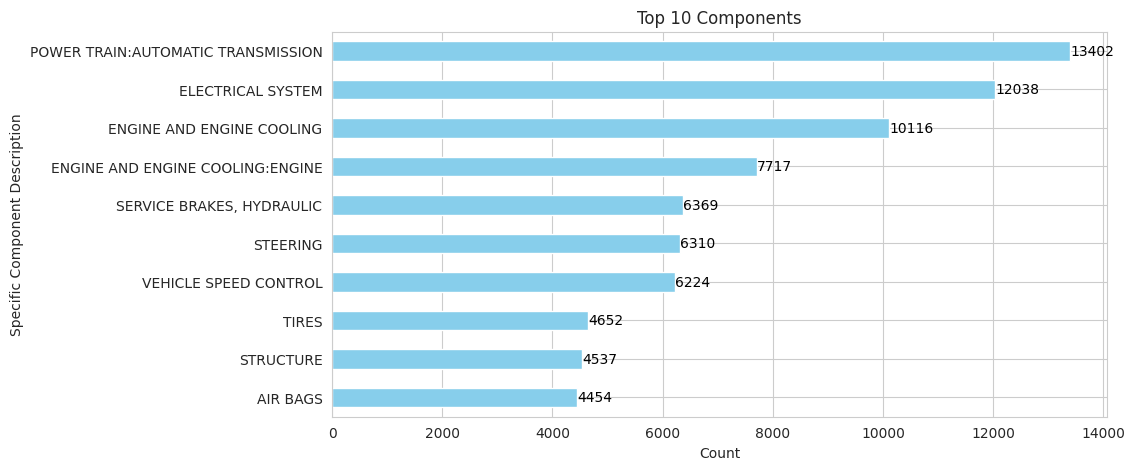

In [113]:
# Create subplots
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

# Plot the top 10 complaints using a horizontal bar plot
complaint_counts = df["SPECIFIC COMPONENT'S DESCRIPTION"].value_counts().head(10).sort_values()
complaint_plot = complaint_counts.plot(kind='barh', ax=ax1, color='skyblue')

# Add data labels to each bar
for i, count in enumerate(complaint_counts):
    ax1.text(count, i, str(count), ha='left', va='center', fontsize=10, color='black')

# Set plot title and labels
ax1.set_title('Top 10 Components')
ax1.set_xlabel('Count')
ax1.set_ylabel('Specific Component Description')

plt.show()

In [114]:
#  Group by 'DESCRIPTION OF THE COMPLAINT' and count the frequency of each complaint
complaint_counts = df["SPECIFIC COMPONENT'S DESCRIPTION"].value_counts()

#  Sort the complaints by their frequency in descending order
top_complaints = complaint_counts.head(10)  # Get the top 10 most common complaints

# Display the top complaints
print("Top Complaints:")
print(top_complaints)
print()

Top Complaints:
SPECIFIC COMPONENT'S DESCRIPTION
POWER TRAIN:AUTOMATIC TRANSMISSION    13402
ELECTRICAL SYSTEM                     12038
ENGINE AND ENGINE COOLING             10116
ENGINE AND ENGINE COOLING:ENGINE       7717
SERVICE BRAKES, HYDRAULIC              6369
STEERING                               6310
VEHICLE SPEED CONTROL                  6224
TIRES                                  4652
STRUCTURE                              4537
AIR BAGS                               4454
Name: count, dtype: int64



The top 3 complaints from car owners are Power Train: Automatic Transmission, Electrical System, Engine and Engine cooling.

# Top 10 Vehicle Makes involved in a car crash

In [115]:
# Filter the dataset to include only rows where the vehicle was involved in a crash
crash_df = df[df['WAS VEHICLE INVOLVED IN A CRASH'] == 'Y']

# Count the number of unique car makes involved in crashes
num_car_makes_involved_in_crashes = crash_df['VEHICLE MAKE'].nunique()

print("Number of car makes involved in car crashes:", num_car_makes_involved_in_crashes)

Number of car makes involved in car crashes: 122


# Year With the most Complaints

In [116]:
import pandas as pd

# Step 1: Filter the dataset to include only rows where the vehicle make is one of the top 10
top_10_car_makes = df['VEHICLE MAKE'].value_counts().head(10).index
filtered_df = df[df['VEHICLE MAKE'].isin(top_10_car_makes)]

# Step 2: Count the occurrences of each year in the filtered dataset
year_counts = filtered_df['MODEL YEAR'].value_counts()

# Step 3: Determine the year with the highest number of complaints
most_complaints_year = year_counts.idxmax()

print("Year with the most complaints among the top 10 vehicle makes:", most_complaints_year)

Year with the most complaints among the top 10 vehicle makes: 2004.0


**From the dataset it can be observed that cars produced in 2004 experienced the most complaints from its users **

# Explore Unknown

**Explore Rows under "SPECIFIC COMPONENT'S DESCRIPTION' that are tagged as UNKNOWN, that is, rows with which we do not know what the complaint is**

In [117]:
df.query("`SPECIFIC COMPONENT'S DESCRIPTION` == \"UNKNOWN OR OTHER\"").shape

(2517, 20)

In [118]:
df.query("`SPECIFIC COMPONENT'S DESCRIPTION` == \"UNKNOWN OR OTHER\"").count()

Complain ID                         2517
MANUFACTURER'S NAME                 2517
VEHICLE MAKE                        2517
VEHICLE MODEL                       2517
MODEL YEAR                          2517
WAS VEHICLE INVOLVED IN A CRASH     2517
WAS VEHICLE INVOLVED IN A FIRE      2517
NUMBER OF PERSONS INJURED           2517
NUMBER OF FATALITIES                2517
SPECIFIC COMPONENT'S DESCRIPTION    2517
CONSUMER'S CITY                     2517
CONSUMER'S STATE CODE               2517
VEHICLE MILEAGE AT FAILURE          1543
DESCRIPTION OF THE COMPLAINT        2517
WAS INCIDENT REPORTED TO POLICE     2517
ANTI-LOCK BRAKES                    2517
CRUISE CONTROL                      2517
VEHICLE SPEED                       1182
WAS VEHICLE TOWED                   2517
Year                                2517
dtype: int64

In [119]:
df.query("`SPECIFIC COMPONENT'S DESCRIPTION` == \"UNKNOWN OR OTHER\"").head()

,Complain ID,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,NUMBER OF FATALITIES,SPECIFIC COMPONENT'S DESCRIPTION,CONSUMER'S CITY,CONSUMER'S STATE CODE,VEHICLE MILEAGE AT FAILURE,DESCRIPTION OF THE COMPLAINT,WAS INCIDENT REPORTED TO POLICE,ANTI-LOCK BRAKES,CRUISE CONTROL,VEHICLE SPEED,WAS VEHICLE TOWED,Year
0,514478,"Nissan North America, Inc.",NISSAN,ALTIMA,2000.0,N,N,0,0,UNKNOWN OR OTHER,SUNNYVALE,CA,NaN,"HEAT DISPAY, SPEEDOMETER/ODOMETER/RPM METER FA...",N,N,Y,65.0,N,2005
87,514628,Honda (American Honda Motor Co.),HONDA,CIVIC,2004.0,N,N,0,0,UNKNOWN OR OTHER,ULSTER PARK,NY,3723.0,PROBLEMS WITH AN OPAQUE FILM THAT DEVELOPED ON...,N,N,N,NaN,N,2004
208,514791,Honda (American Honda Motor Co.),HONDA,PILOT,2004.0,N,N,0,0,UNKNOWN OR OTHER,HARRISBURG,PA,NaN,FRAME AND STRUCTURE TENDS TO SHAKE AND MAKE NO...,N,N,Y,50.0,N,2004
285,514890,"General Motors, LLC",CHEVROLET,IMPALA,2002.0,N,N,0,0,UNKNOWN OR OTHER,SMITHTON,IL,NaN,"THIS PROBLEM HAS OCCURRED MORE THAN ONCE, AND ...",N,Y,Y,NaN,N,2004
306,514917,Hyundai Motor America,HYUNDAI,ELANTRA,2001.0,N,N,0,0,UNKNOWN OR OTHER,DUARTE,CA,67198.0,THE BALL JOINTS CRACKED WHICH CAUSED THE FRONT...,N,Y,N,70.0,N,2004


# Calculate the number of complaints, incidents involving crashes, incidents involving fires, and fatalities per year

In [120]:
# Calculate the number of complaints, incidents involving crashes, incidents involving fires, and fatalities per year
complaints_per_year = df.groupby('Year').size()
crashes_per_year = df[df['WAS VEHICLE INVOLVED IN A CRASH'] == 'Y'].groupby('Year').size()
fires_per_year = df[df['WAS VEHICLE INVOLVED IN A FIRE'] == 'Y'].groupby('Year').size()
fatalities_per_year = df.groupby('Year')['NUMBER OF FATALITIES'].sum()

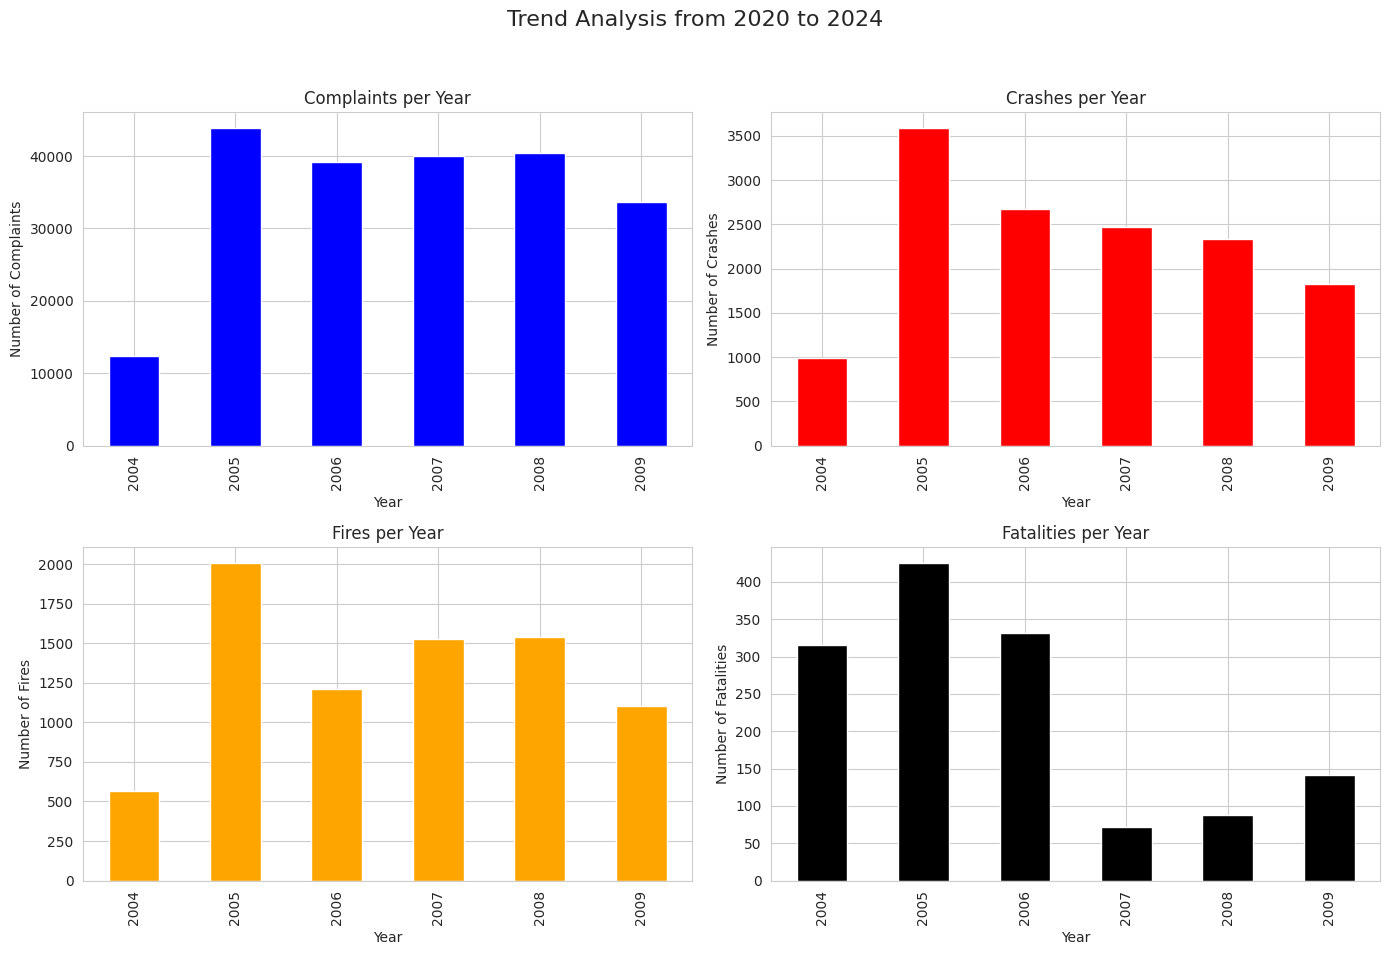

Year with the highest number of cars involved in a crash: 2005
Number of cars involved in a fatality in that year: 0


In [121]:
# Now let's create bar charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Trend Analysis from 2020 to 2024', fontsize=16)

# Number of complaints per year
complaints_per_year = df['Year'].value_counts().sort_index()
complaints_per_year.plot(kind='bar', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Complaints per Year')
axes[0, 0].set_ylabel('Number of Complaints')
axes[0, 0].set_xlabel('Year')

# Crashes per year
crashes_per_year = df[df['WAS VEHICLE INVOLVED IN A CRASH'] == 'Y']['Year'].value_counts().sort_index()
crashes_per_year.plot(kind='bar', ax=axes[0, 1], color='red')
axes[0, 1].set_title('Crashes per Year')
axes[0, 1].set_ylabel('Number of Crashes')
axes[0, 1].set_xlabel('Year')

# Fires per year
fires_per_year = df[df['WAS VEHICLE INVOLVED IN A FIRE'] == 'Y']['Year'].value_counts().sort_index()
fires_per_year.plot(kind='bar', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Fires per Year')
axes[1, 0].set_ylabel('Number of Fires')
axes[1, 0].set_xlabel('Year')

# Fatalities per year
fatalities_per_year = df.groupby('Year')['NUMBER OF FATALITIES'].sum()
fatalities_per_year.plot(kind='bar', ax=axes[1, 1], color='black')
axes[1, 1].set_title('Fatalities per Year')
axes[1, 1].set_ylabel('Number of Fatalities')
axes[1, 1].set_xlabel('Year')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the layout to make room for the suptitle
plt.show()

# Year with the highest crashes, Fires and Fatalies and corresponding Numbers

#  Group the data by year and count the occurrences of cars involved in a crash, Fires and Fatalies for each year
crashes_per_year = df[df['WAS VEHICLE INVOLVED IN A CRASH'] == 'Y'].groupby('Year').size()
Fires_per_year = df[df['WAS VEHICLE INVOLVED IN A FIRE'] == 'Y'].groupby('Year').size()
Fires_per_year = df[df['NUMBER OF FATALITIES'] == 'Y'].groupby('Year').size()

# Determine the year with the highest number of cars involved in a crash
year_with_most_crashes = crashes_per_year.idxmax()
year_with_most_fire = crashes_per_year.idxmax()
year_with_most_fatalities = crashes_per_year.idxmax()

# Filter the data for that year and count the occurrences of cars involved in a fatality
fatalities_in_year_with_most_crashes = df[(df['NUMBER OF FATALITIES'] == 'Y') & (df['Year'] == year_with_most_crashes)]['NUMBER OF FATALITIES'].sum()



print("Year with the highest number of cars involved in a crash:", year_with_most_crashes)
print("Number of cars involved in a fatality in that year:", fatalities_in_year_with_most_crashes)


In [122]:
# Number of Cars
# Step 1: Group the data by year and count the occurrences of cars involved in a crash for each year
crashes_per_year = df[df['WAS VEHICLE INVOLVED IN A CRASH'] == 'Y'].groupby('Year').size()

# Step 2: Determine the year with the highest number of cars involved in a crash
year_with_most_crashes = crashes_per_year.idxmax()

# Step 3: Filter the data for that year and count the occurrences of cars involved in a fatality
fatalities_in_year_with_most_crashes = df[(df['WAS VEHICLE INVOLVED IN A CRASH'] == 'Y') & (df['Year'] == year_with_most_crashes)]['NUMBER OF FATALITIES'].sum()

print("Year with the highest number of cars involved in a crash:", year_with_most_crashes)
print("Number of cars involved in crashes in that year:", fatalities_in_year_with_most_crashes)


Year with the highest number of cars involved in a crash: 2005
Number of cars involved in crashes in that year: 106


# Group all Complaints based on Vehicle Make

In [123]:
# Group by 'VEHICLE MAKE' and count the complaints
v_make_complaints = df.groupby('VEHICLE MAKE')['Complain ID'].count().reset_index(name='Complaint Count')

# Sort the makes by the number of complaints and get the top 10
top_makes = v_make_complaints.sort_values(by='Complaint Count', ascending=False).head(10)

# Now for each of these makes, find the year with the most complaints
top_make_years = pd.DataFrame()

for make in top_makes['VEHICLE MAKE']:
    # Filter the DataFrame to only this make
    make_df = df[df['VEHICLE MAKE'] == make]

    # Group by 'YEAR' and count the complaints for this make
    year_complaints = make_df.groupby('Year')['Complain ID'].count().reset_index(name='Complaint Count')

    # Find the year with the maximum complaints for this make
    max_year_index = year_complaints['Complaint Count'].idxmax()
    max_complaints_year = year_complaints.loc[[max_year_index]]


    max_complaints_year = max_complaints_year.assign(**{'VEHICLE MAKE': make})

    # Add the make and the year with the max complaints to the new DataFrame
    top_make_years = pd.concat([top_make_years, max_complaints_year], ignore_index=True)

# Sort the result to have the make with the overall most complaints at the top
top_make_years = top_make_years.sort_values(by='Complaint Count', ascending=False)

# Select only the relevant columns to display
top_make_years = top_make_years[['VEHICLE MAKE', 'Year', 'Complaint Count']]

In [124]:
top_make_years

,VEHICLE MAKE,Year,Complaint Count
0,FORD,2005,7812
1,CHEVROLET,2005,6222
2,DODGE,2005,4449
3,TOYOTA,2009,4013
4,HONDA,2008,2449
6,JEEP,2007,2425
5,NISSAN,2008,2279
7,CHRYSLER,2005,1656
8,PONTIAC,2007,1413
9,VOLKSWAGEN,2005,1331


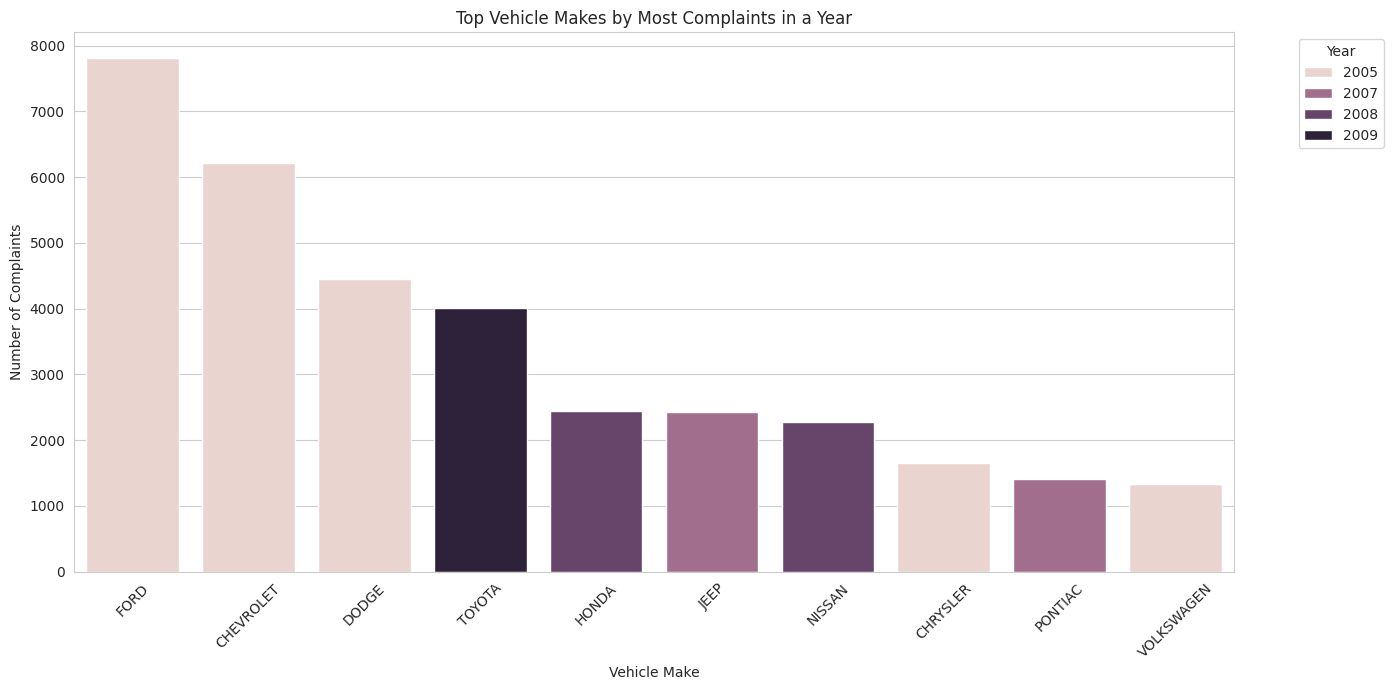

In [145]:
# Set the visual style of the plots
sns.set_style("whitegrid")

# Create a bar chart
plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    data=top_make_years,
    x='VEHICLE MAKE',
    y='Complaint Count',
    hue='Year',  # Color bars by the year
    dodge=False  # Place all bars for each make side-by-side
)

# Add a title and labels to the plot
plt.title('Top Vehicle Makes by Most Complaints in a Year')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Position the legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

Ford Vehicle had the most complaint in 2005. So its paramount to look into this particular year and figure out which Ford model had most issues.

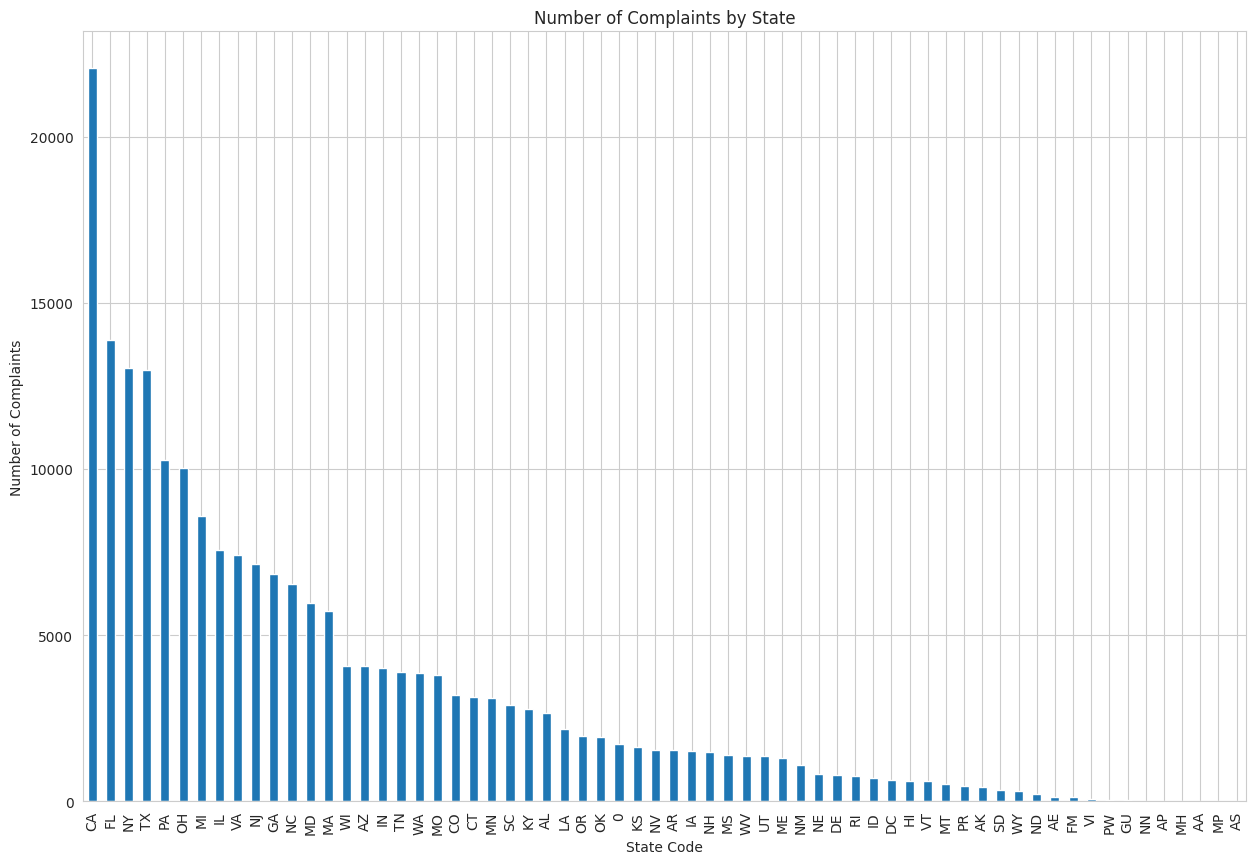

In [126]:
complaints_by_state = df["CONSUMER'S STATE CODE"].value_counts()

# Now let's visualize the number of complaints by state using a bar chart
plt.figure(figsize=(15, 10))
complaints_by_state.plot(kind='bar')
plt.title('Number of Complaints by State')
plt.xlabel('State Code')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)  # Rotate the state codes for better readability
plt.show()

perform hypothesis testing (e.g., chi-squared tests for categorical variables or t-tests for continuous variables) to determine if the differences in rates are statistically significant.

In [127]:
from scipy.stats import chi2_contingency

# Create a contingency table for crashes and anti-lock brakes
contingency_table = pd.crosstab(df['WAS VEHICLE INVOLVED IN A CRASH'], df['ANTI-LOCK BRAKES'])

In [128]:
contingency_table

ANTI-LOCK BRAKES,N,Y
WAS VEHICLE INVOLVED IN A CRASH,,
N,104524,91068
Y,6522,7366


In [129]:

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the p-value
print(f'Chi-squared test p-value: {p}')

Chi-squared test p-value: 2.205638478166179e-49


A chi-squared test p-value of 2.2056 × 1 0 − 279 2.593×10 −279 is extremely small—essentially zero for all practical purposes. In hypothesis testing, a p-value is the probability of observing the test results under the null hypothesis, which usually states that there is no association between the variables tested.

In this context, such a minuscule p-value suggests that the null hypothesis (which would claim there is no association between the presence of anti-lock brakes and the incidence of crashes) can be rejected with very high confidence. This indicates that there is a statistically significant association between the two variables in your dataset.

Given the p-value is well below the common alpha level of 0.05, you have very strong evidence against the null hypothesis. This means that the presence or absence of anti-lock brakes is associated with whether or not the vehicle was involved in a crash, according to your dataset.

In [130]:
contingency_table = pd.crosstab(df['WAS VEHICLE INVOLVED IN A CRASH'], df['CRUISE CONTROL'])

In [131]:
contingency_table

CRUISE CONTROL,N,Y
WAS VEHICLE INVOLVED IN A CRASH,,
N,97400,98192
Y,6202,7686


In [132]:
# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the p-value
print(f'Chi-squared test p-value: {p}')


Chi-squared test p-value: 1.2929811043800461e-31


# FORD ANALYSIS

In [139]:
ford_df = df.query("`VEHICLE MAKE` == 'FORD'")

In [140]:
ford_df.head()

,Complain ID,MANUFACTURER'S NAME,VEHICLE MAKE,VEHICLE MODEL,MODEL YEAR,WAS VEHICLE INVOLVED IN A CRASH,WAS VEHICLE INVOLVED IN A FIRE,NUMBER OF PERSONS INJURED,NUMBER OF FATALITIES,SPECIFIC COMPONENT'S DESCRIPTION,CONSUMER'S CITY,CONSUMER'S STATE CODE,VEHICLE MILEAGE AT FAILURE,DESCRIPTION OF THE COMPLAINT,WAS INCIDENT REPORTED TO POLICE,ANTI-LOCK BRAKES,CRUISE CONTROL,VEHICLE SPEED,WAS VEHICLE TOWED,Year
7,514513,Ford Motor Company,FORD,CONTOUR,2000.0,N,N,0,0,STRUCTURE,SOCIAL CIRCLE,GA,30000.0,DASHBOARD SEPARATED FROM STRUCTURE AND ROSE U...,N,Y,Y,NaN,N,2004
9,514518,Ford Motor Company,FORD,TAURUS,2000.0,N,N,0,0,SUSPENSION:FRONT:SPRINGS:COIL SPRINGS,NORTHVILLE,MI,29965.0,WHILE BACKING OUT OF THE DRIVEWAY CONSUMER HEA...,N,Y,Y,NaN,N,2004
16,514525,Ford Motor Company,FORD,CONTOUR,1999.0,N,N,0,0,STRUCTURE,EL CAJON,CA,30000.0,CONSUMER COMPLAINED ABOUT DASH BOARD PROBLEM....,N,N,N,NaN,N,2005
22,514532,Ford Motor Company,FORD,FOCUS,2000.0,Y,N,0,0,ELECTRICAL SYSTEM:IGNITION:SWITCH,MEMPHIS,TN,NaN,WHILE PLACING THE KEY IN THE IGNITION SWITCH V...,Y,N,N,65.0,N,2006
29,514539,Ford Motor Company,FORD,WINDSTAR,1999.0,N,N,0,0,POWER TRAIN:AUTOMATIC TRANSMISSION:TORQUE CONV...,WEST BEND,WI,NaN,"WHILE DRIVING 65 MPH, THE OVER DRIVE LIGHT APP...",N,N,N,65.0,N,2004


# Ford Model Experiencing the Most Complaints from Users

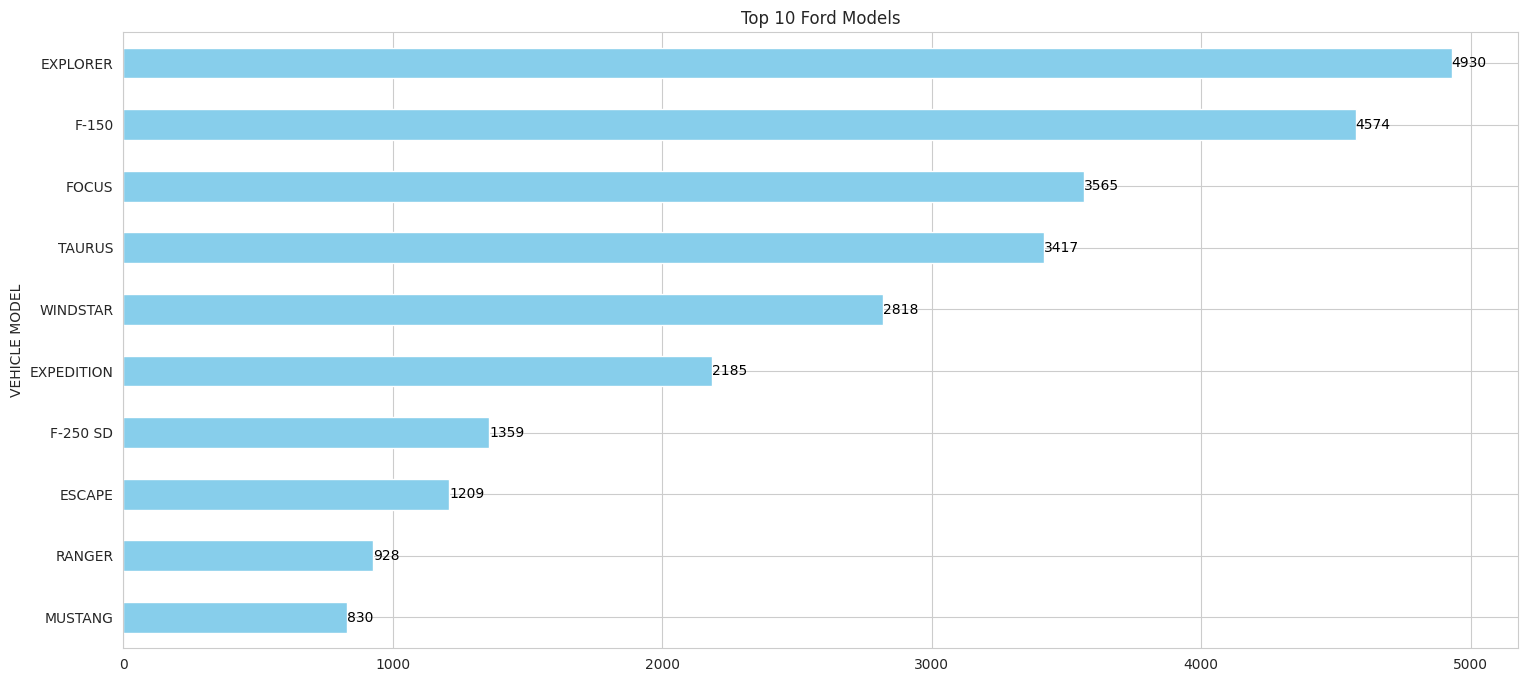

In [144]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(18, 8))

# Plot the top 10 Ford models
ford_df['VEHICLE MODEL'].value_counts().head(10).sort_values().plot(kind='barh', ax=ax, color='skyblue')

# Add data labels to each bar
for i, count in enumerate(ford_df['VEHICLE MODEL'].value_counts().head(10).sort_values()):
    ax.text(count, i, str(count), ha='left', va='center', fontsize=10, color='black')

# Set plot title
ax.set_title('Top 10 Ford Models')

# Show the plot
plt.show()